#  Final test


## sklearn.datasets.load_digits

### importing libraries

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [36]:

dataset = load_digits()
print(dataset)


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

<Figure size 432x288 with 0 Axes>

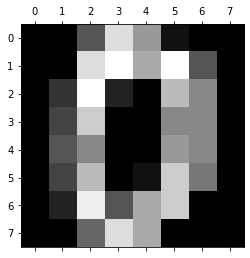

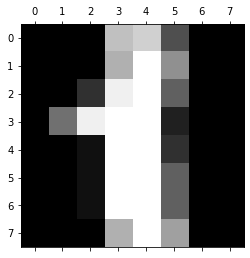

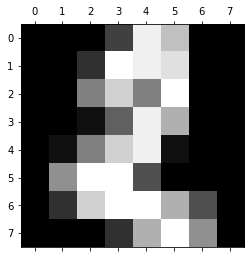

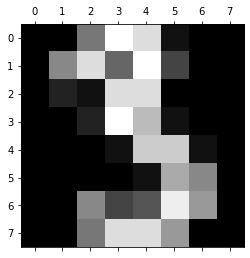

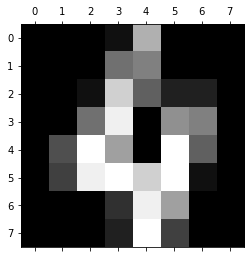

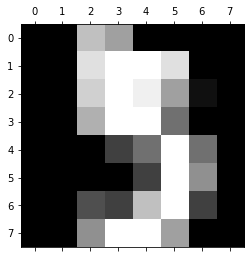

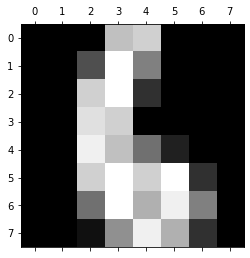

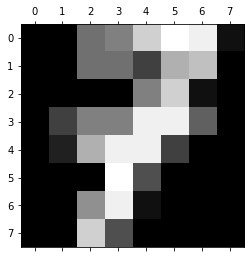

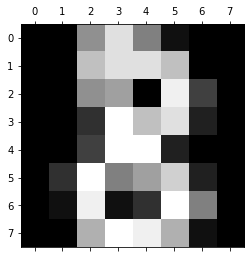

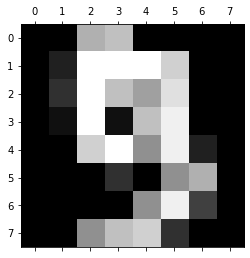

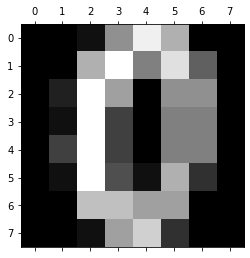

In [19]:
#ploting each image 
plt.gray()
for i in range(11):
    
    plt.matshow(dataset.images[i])

In [38]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


nlen = len(dataset.images)
data = dataset.images.reshape((nlen, -1))

# Created a model: a support vector classifier
genmodel= svm.SVC(gamma=0.001)

# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(
    data, dataset.target, test_size=0.8, shuffle=False
)

# training the digits on the train subset
genmodel.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = genmodel.predict(X_test)

In [39]:
print(
    f"model accuracy {genmodel}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

model accuracy SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       140
           1       0.90      0.73      0.80       144
           2       0.86      0.93      0.89       141
           3       0.98      0.76      0.86       145
           4       0.98      0.97      0.97       147
           5       0.96      0.92      0.94       146
           6       0.97      0.96      0.96       145
           7       0.96      0.91      0.94       144
           8       0.84      0.87      0.86       140
           9       0.65      0.91      0.76       146

    accuracy                           0.89      1438
   macro avg       0.91      0.89      0.90      1438
weighted avg       0.91      0.89      0.90      1438




[[139   0   0   0   1   0   0   0   0   0]
 [  0 105  18   0   0   1   4   0  13   3]
 [  0   0 131   2   0   0   0   0   0   8]
 [  0   0   2 110   0   3   0   2   4  24]
 [  0   0   0   0 142   0   0   1   0   4]
 [  0   0   0   0   2 134   1   0   0   9]
 [  2   1   0   0   0   0 139   0   3   0]
 [  0   0   0   0   0   0   0 131   1  12]
 [  0   3   2   0   0   1   0   0 122  12]
 [  0   8   0   0   0   1   0   2   2 133]]


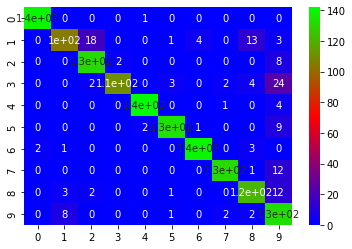

In [43]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test,predicted)

print(matrix)

import seaborn as sns

ax = sns.heatmap(matrix, annot=True, cmap='brg')